In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.statespace.tools import diff
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [5]:
test=pd.read_csv("DS3_C1_S4_DailyDelhiClimateTest_Data_Practice.csv", parse_dates=['date']).set_index('date')
train=pd.read_csv("DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice.csv", parse_dates=['date']).set_index('date')
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [7]:
train.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

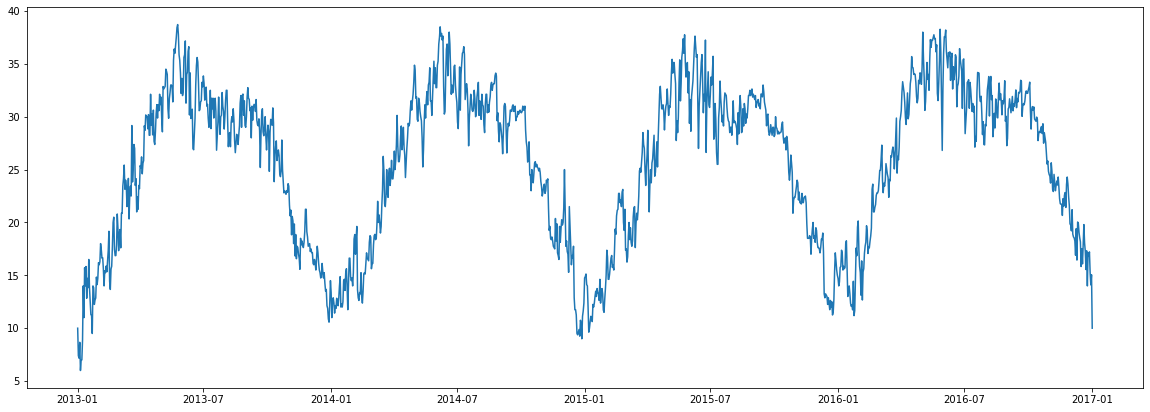

In [8]:
plt.figure(figsize=(20,7))
plt.plot(train.meantemp);

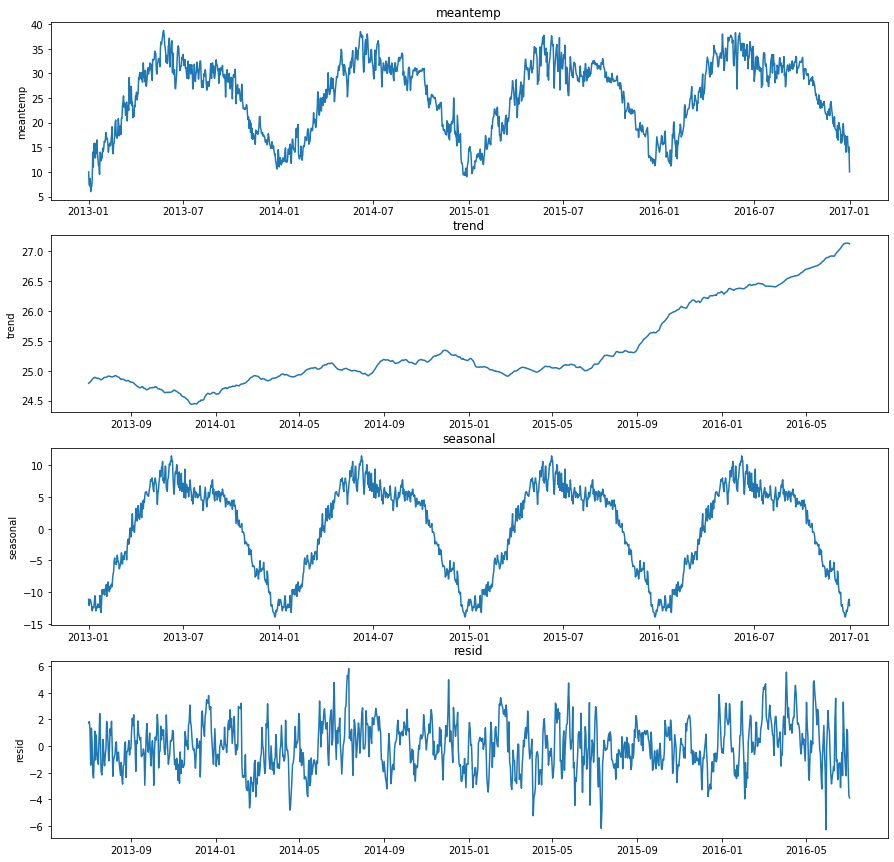

In [9]:
train.sort_index(inplace=True)
decomposition = seasonal_decompose(train['meantemp'], model='additive',period=365)

dt=decomposition.trend
ds=decomposition.seasonal
dr=decomposition.resid

a= [train['meantemp'],dt,ds,dr]

# Trend
fig , axes =plt.subplots(4,1, figsize=(15,15))
for i ,ax in zip(a,axes.flatten()):
    ax.plot(i)
    ax.set_ylabel(i.name)
    ax.set_title(i.name)

In [10]:
train_m=train['meantemp']
train_m.head()

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
Name: meantemp, dtype: float64

In [11]:
train_weekly = train_m.resample('W').mean()
train_weekly.head()
test = test.resample('W').mean()
train_weekly.head()

date
2013-01-06     7.705556
2013-01-13    12.343537
2013-01-20    13.642857
2013-01-27    12.329592
2013-02-03    15.736905
Freq: W-SUN, Name: meantemp, dtype: float64

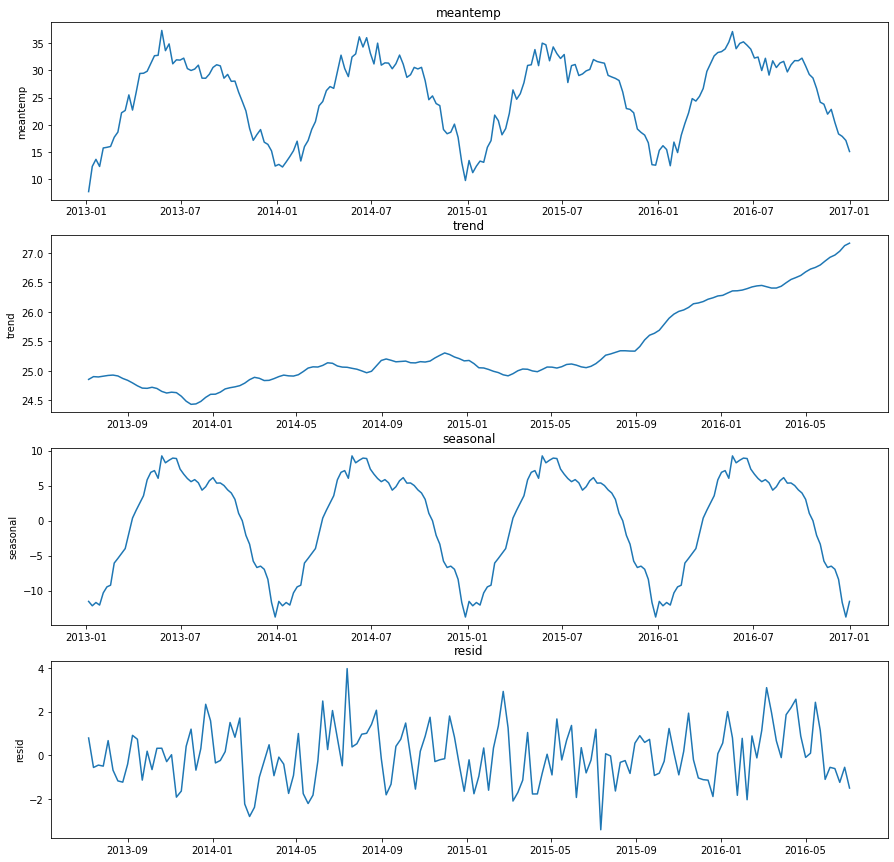

In [12]:
decomposition = seasonal_decompose(train_weekly, model='additive')

dtrnd=decomposition.trend
dsnl=decomposition.seasonal
drsd=decomposition.resid

a= [train_weekly,dtrnd,dsnl,drsd]

fig , axes =plt.subplots(4,1, figsize=(15,15))
for i ,ax in zip(a,axes.flatten()):
    ax.plot(i)
    ax.set_ylabel(i.name)
    ax.set_title(i.name)

In [13]:
model_d = ExponentialSmoothing(train['meantemp'],trend='add',seasonal='add',seasonal_periods=30).fit()

Text(0.5, 1.0, 'Triple Exponent Smoothing')

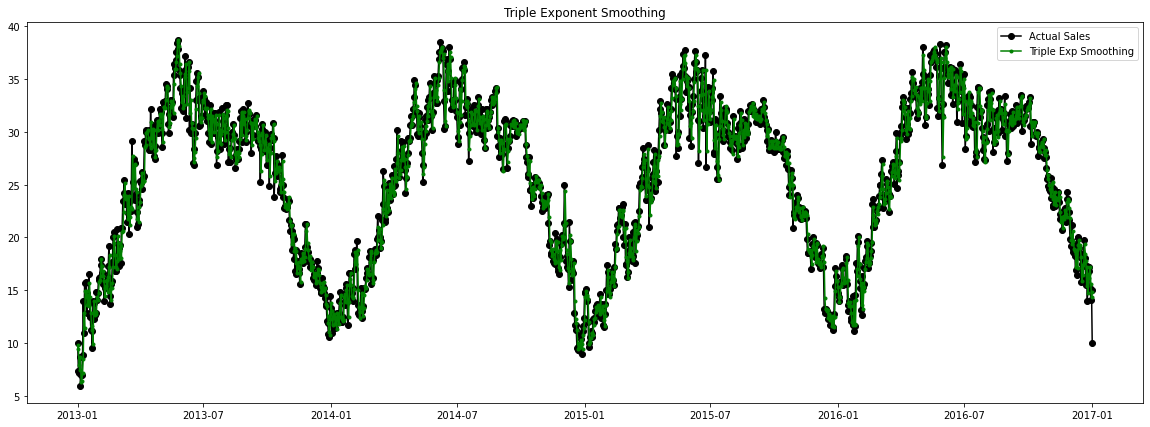

In [14]:
plt.figure(figsize=(20,7))
plt.plot(train['meantemp'], marker='o',color='black',label='Actual Sales')
plt.plot(model_d.fittedvalues,marker='.',color='green',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

Text(0.5, 1.0, 'Triple Exponent Smoothing')

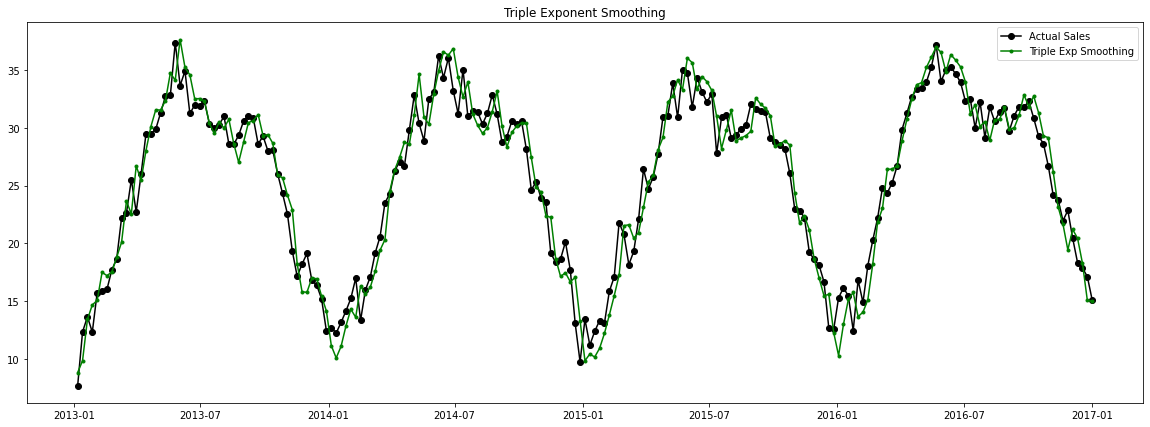

In [15]:
model = ExponentialSmoothing(train_weekly,trend='add',seasonal='add',seasonal_periods=30).fit()
plt.figure(figsize=(20,7))
plt.plot(train_weekly, marker='o',color='black',label='Actual Sales')
plt.plot(model.fittedvalues,marker='.',color='green',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

In [16]:
pvalue = adfuller(train_weekly)[1]

if(pvalue>0.05):
    print('p-value={}. Data is not stationary'.format(pvalue))
else:
    print('p-value={}. Data is stationary'.format(pvalue))

p-value=6.898378388762624e-05. Data is stationary


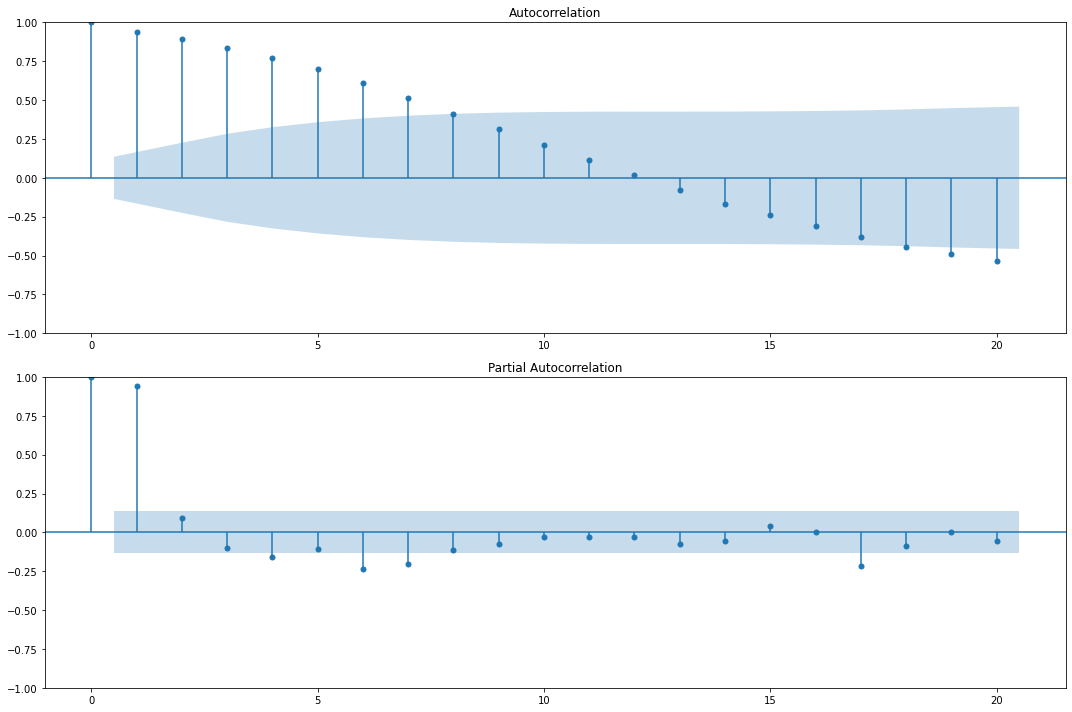

In [17]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(train_weekly, lags=20, ax=ax1)

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(train_weekly, lags=20, ax=ax2)

plt.tight_layout()

In [18]:
m1 = auto_arima(train_weekly,start_p=0,max_p=5, start_q=0,max_q=40, seasonal=False)
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:               SARIMAX(2, 0, 4)   Log Likelihood                -431.247
Date:                Mon, 26 Dec 2022   AIC                            876.495
Time:                        17:24:19   BIC                            899.891
Sample:                    01-06-2013   HQIC                           885.954
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8176      0.075     24.301      0.000       1.671       1.964
ar.L2         -0.8204      0.075    -10.993      0.000      -0.967      -0.674
ma.L1         -1.0240      0.104     -9.828      0.000      -1.228      -0.820
ma.L2          0.2581      0.100      2.589      0.010       0.063       0.453
ma.L3         -0.0162      0.096     -0.169      0.866      -0.204       0.172
ma.L4          0.1740      0.071      2.437      0.015       0.034       0.314
sigma2         3.5280      0.398      8.871      0.000       2.749       4.307
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.72
Prob(Q):                              0.92   Prob(JB):                         0.26
Heteroskedasticity (H):               0.74   Skew:                            -0.19
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
m1 = ARIMA(train_weekly,order=(2,0,3))
r1 = m1.fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  209
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -421.794
Date:                Mon, 26 Dec 2022   AIC                            857.588
Time:                        17:24:19   BIC                            880.984
Sample:                    01-06-2013   HQIC                           867.047
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2493      0.398     63.516      0.000      24.470      26.028
ar.L1          1.9749      0.006    305.448      0.000       1.962       1.988
ar.L2         -0.9894      0.006   -158.911      0.000      -1.002      -0.977
ma.L1         -1.2766      0.072    -17.786      0.000      -1.417      -1.136
ma.L2          0.2824      0.110      2.577      0.010       0.068       0.497
ma.L3          0.0319      0.072      0.443      0.658      -0.109       0.173
sigma2         3.2332      0.341      9.490      0.000       2.565       3.901
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 5.60
Prob(Q):                              0.75   Prob(JB):                         0.06
Heteroskedasticity (H):               0.82   Skew:                            -0.40
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
predictions = r1.predict(len(train_weekly),len(train_weekly)+(len(test)-1))
predictions

2017-01-08    14.898328
2017-01-15    14.499755
2017-01-22    14.219708
2017-01-29    14.102399
2017-02-05    14.147799
2017-02-12    14.353520
2017-02-19    14.714881
2017-02-26    15.224992
2017-03-05    15.874884
2017-03-12    16.653658
2017-03-19    17.548664
2017-03-26    18.545703
2017-04-02    19.629249
2017-04-09    20.782687
2017-04-16    21.988568
2017-04-23    23.228867
2017-04-30    24.485252
2017-05-07    25.739355
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [21]:
DF = pd.DataFrame({'Acctual':test['meantemp'],'Predicted':predictions,'Error': (test['meantemp']-predictions)}).dropna()
DF

,Acctual,Predicted,Error
2017-01-08,17.487247,14.898328,2.588918
2017-01-15,13.191727,14.499755,-1.308028
2017-01-22,14.732486,14.219708,0.512778
2017-01-29,17.239193,14.102399,3.136794
2017-02-05,16.839757,14.147799,2.691958
2017-02-12,15.661508,14.353520,1.307988
2017-02-19,19.402628,14.714881,4.687747
2017-02-26,19.976190,15.224992,4.751199
2017-03-05,21.542125,15.874884,5.667241
2017-03-12,20.114572,16.653658,3.460914


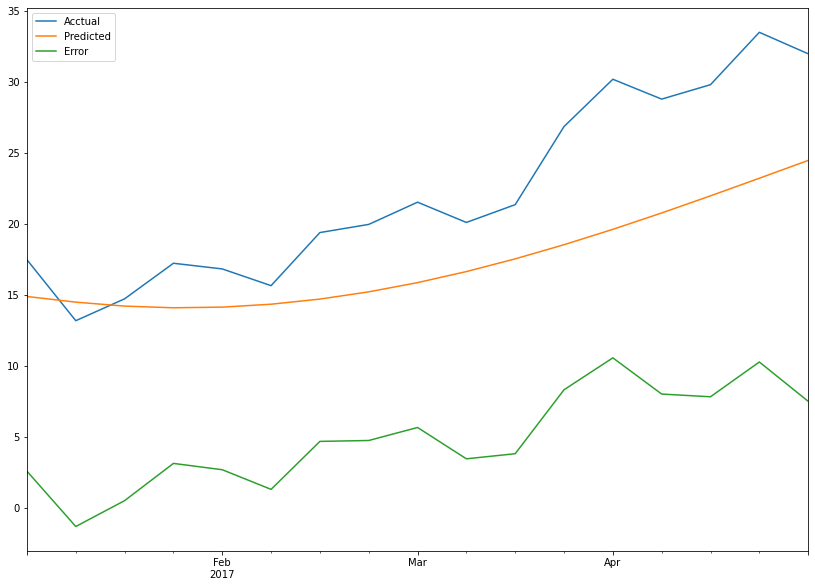

In [22]:
DF.plot(figsize=(14,10));

## LJung-Box test

In [23]:
pvalue = sm.stats.acorr_ljungbox(r1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [24]:
# MSE
msg = 'ARMA Model. Order=(' + str(5) + ',' + str(3) + ')'
mse1 = mean_squared_error(DF.Acctual, DF.Predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(5,3)
	MSE = 35.27941257382898
	RMSE = 5.939647512591044


In [25]:
p=2; q=3; d=0
m1 = sm.tsa.statespace.SARIMAX(train_weekly,order=(p,d,q),seasonal_order=(p,d,q,52)).fit()

In [26]:
predictions = m1.predict(start=len(train_weekly),end=len(train_weekly)+(len(test)-1),dynamic=True)
predictions

2017-01-08    15.457260
2017-01-15    15.806084
2017-01-22    15.427169
2017-01-29    16.173265
2017-02-05    16.557375
2017-02-12    14.800910
2017-02-19    16.072276
2017-02-26    16.442110
2017-03-05    17.701994
2017-03-12    18.139272
2017-03-19    19.771957
2017-03-26    19.494308
2017-04-02    20.782791
2017-04-09    21.621693
2017-04-16    21.400673
2017-04-23    22.693017
2017-04-30    24.076258
2017-05-07    23.254968
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [27]:
train_res = pd.DataFrame({'actual':test['meantemp'],'predicted':predictions})
train_res['err'] = train_res.actual - train_res.predicted
train_res.dropna(inplace=True)
train_res

,actual,predicted,err
2017-01-08,17.487247,15.457260,2.029986
2017-01-15,13.191727,15.806084,-2.614357
2017-01-22,14.732486,15.427169,-0.694684
2017-01-29,17.239193,16.173265,1.065928
2017-02-05,16.839757,16.557375,0.282382
2017-02-12,15.661508,14.800910,0.860598
2017-02-19,19.402628,16.072276,3.330353
2017-02-26,19.976190,16.442110,3.534080
2017-03-05,21.542125,17.701994,3.840130
2017-03-12,20.114572,18.139272,1.975300


In [28]:
#MSE
mean_squared_error(train_res.actual,train_res.predicted)

29.627781375806858

<AxesSubplot:>

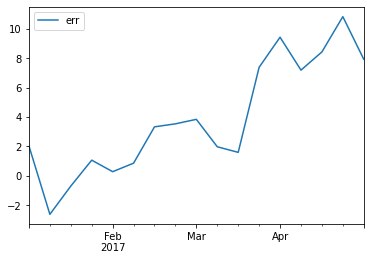

In [29]:
 train_res[["err"]].plot()

<AxesSubplot:>

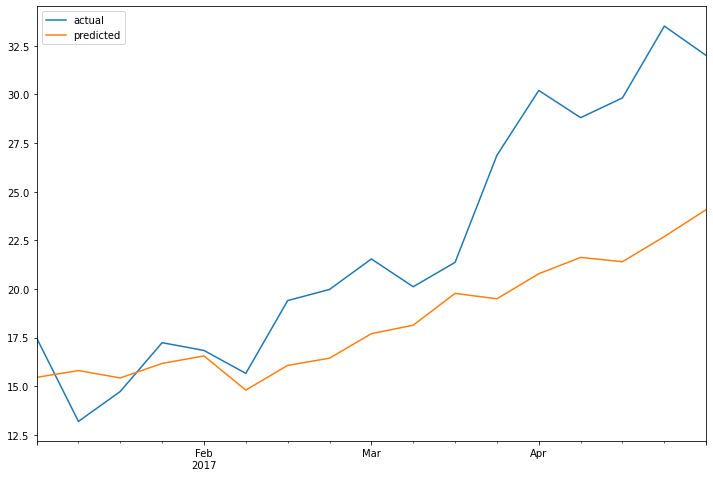

In [30]:
train_res[['actual','predicted']].plot(figsize=(12,8))